# Exercise 22 - Approximate Inference with PyMC

In someone's garden they have a sprinkler that waters that grass when the weather is dry. 

* The sprinkler is less likely to turn on when it rains
* The grass gets wet when it rains or when the sprinker is on.

Given variables $W$ (grass is wet), $S$ (sprinkler is on), and $R$ (it is raining) we can construct the following Bayesian network)

$P(S,R,W) = P(W\vert R,S)P(S\vert R)P(R)$

The conditional probabilities are:

* $P(R) = 0.6$, $P(\lnot R) = 0.4$
* $P(S\vert R) = 0.05$, $P(\lnot S\vert R) = 0.95$, $P(S\vert \lnot R) = 0.8$, $P(\lnot S\vert \lnot R) = 0.2$
* $P(W\vert S\land R) = 0.95$, $P(\lnot W\vert S\land R) = 0.05$
* $P(W\vert S\land \lnot R) = 0.70$, $P(\lnot W\vert S\land \lnot R) = 0.30$
* $P(W\vert \lnot S\land R) = 0.80$, $P(\lnot W\vert \lnot S\land R) = 0.20$
* $P(W\vert \lnot S\land \lnot R) = 0.01$, $P(\lnot W\vert \lnot S\land \lnot R) = 0.99$

Use discrete sampling and rejection sampling to compute the following quantities. Verify your answers by explicit calculation.

1. $P(W)$
2. $P(R\vert W$)
3. $P(S\vert W$)




In [2]:
import pymc as mc
with mc.Model() as model:
    Rain = mc.Bernoulli('Rain', 0.6)
    P_Sprinkler = mc.Deterministic('P_Sprinkler',mc.math.switch(Rain, 0.05, 0.8))
    Sprinkler = mc.Bernoulli('Sprinkler', P_Sprinkler)
    P_Wet = mc.Deterministic('P_Wet',
                             mc.math.switch(Rain,
                                            mc.math.switch(Sprinkler, 0.95, 0.8),
                                            mc.math.switch(Sprinkler, 0.70, 0.01)
                                           )
                            )
    Wet = mc.Bernoulli('Wet',P_Wet)
    step = mc.Metropolis()
    trace = mc.sample(10000, step=step, tune=5000, random_seed=123, progressbar=True)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [Rain]
>Metropolis: [Sprinkler]
>Metropolis: [Wet]


Output()

Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 4 seconds.


array([[<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'Rain'}>],
       [<Axes: title={'center': 'Sprinkler'}>,
        <Axes: title={'center': 'Sprinkler'}>],
       [<Axes: title={'center': 'Wet'}>, <Axes: title={'center': 'Wet'}>],
       [<Axes: title={'center': 'P_Sprinkler'}>,
        <Axes: title={'center': 'P_Sprinkler'}>],
       [<Axes: title={'center': 'P_Wet'}>,
        <Axes: title={'center': 'P_Wet'}>]], dtype=object)

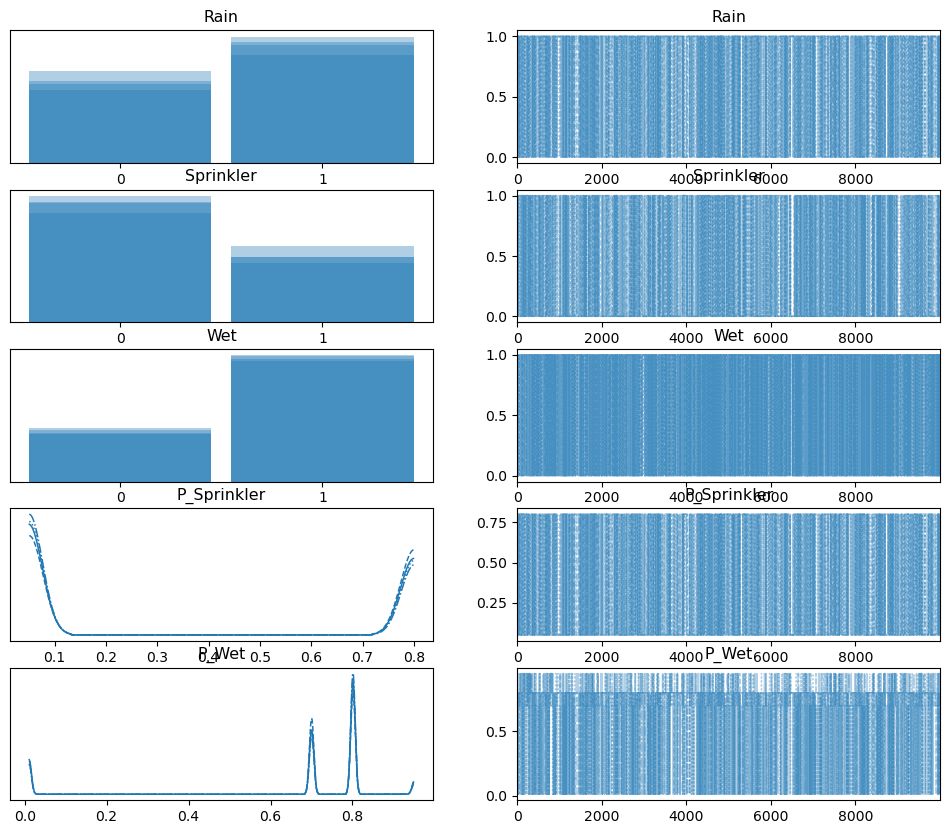

In [3]:
mc.plot_trace(trace)